
#### Importing Libraries

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

![kneeding](https://media.giphy.com/media/RpckSiHL6ZaXS/giphy.gif)

# Enhancing Regression Models

Objectives, be able to use:

Pre-processing:
- handling non-numeric data
 - ordinal: label encoder
 - categorical: one-hot-encoder (which do you drop?)
 - binary encoder
- Scaling

Creating New:
- Interaction terms
- Polynomials
- combinations of other variables

Evaluating:
- R^2 vs adjusted R^2
- AIC
- BIC
- comparing model performance metrics - metrics going up or down?


## Scenario: car seat sales

Description: simulated data set on sales of car seats<br>
Format: 400 observations on the following 11 variables
- Sales: unit sales at each location
- CompPrice: price charged by nearest competitor at each location
- Income: community income level
- Advertising: local advertising budget for company at each location
- Population: population size in region (in thousands)
- Price: price charged for car seat at each site
- ShelveLoc: quality of shelving location at site (Good | Bad | Medium)
- Age: average age of the local population
- Education: education level at each location
- Urban: whether the store is in an urban or rural location
- USA: whether the store is in the US or not

 We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

#### Task
Before looking at the data, brainstorm with your neighbor which four variables you think *might* be related to sales.

In [3]:
df2 = pd.read_csv('Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df2.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


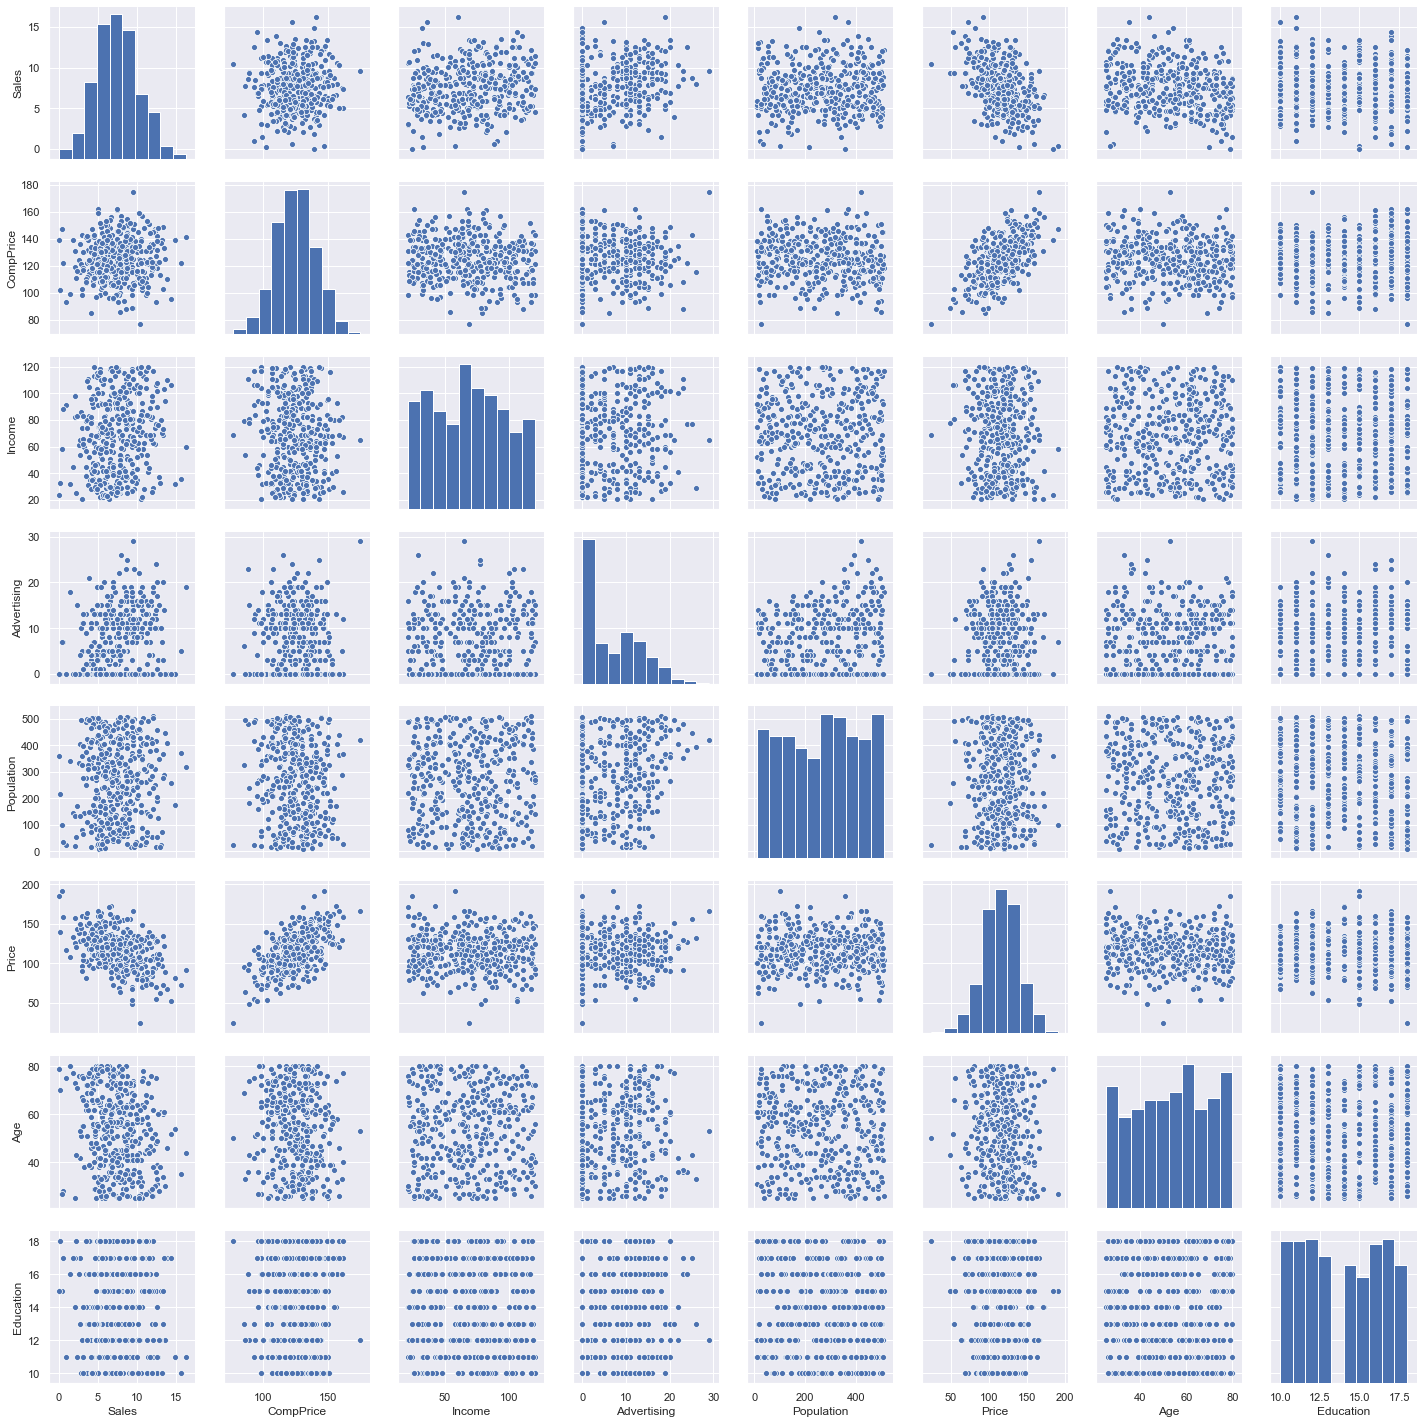

In [10]:
import seaborn as sns
sns.set()

sns.pairplot(df2)

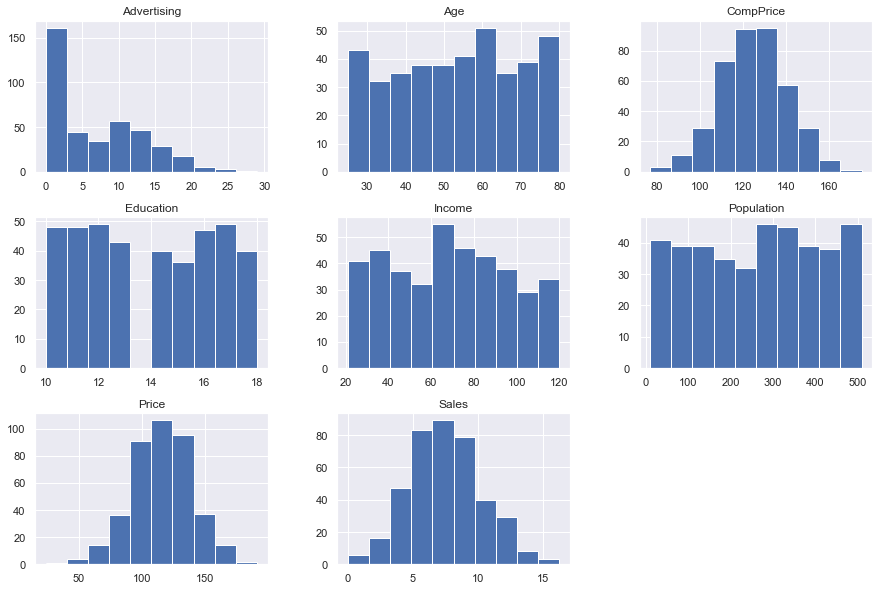

In [11]:
df2.hist(figsize=(15,10));

The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, Python generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [12]:
x_vars=list(df2.columns[df2.columns!='Sales'])

In [17]:
formula = 'Sales ~ ' + ' + '.join(x_vars)
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US'

In [18]:
model = smf.ols(formula, data= df2)

In [19]:
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        11:08:18   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
one_hot_categoricals = df2.select_dtypes(include='object')
one_hot_categorical

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No
...,...,...,...
395,Good,Yes,Yes
396,Medium,No,Yes
397,Medium,Yes,Yes
398,Bad,Yes,Yes


In [24]:
one_hot_numerics = df2.select_dtypes(exclude='object')
one_hot_numerics

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [27]:
encoder = OneHotEncoder(sparse=False)

In [39]:
encoder.fit(df2[['ShelveLoc']])
ohc_transform = pd.DataFrame(encoder.transform(df2[['ShelveLoc']]))
ohc_transform.head()
cats = encoder.categories_[0]
cats

array(['Bad', 'Good', 'Medium'], dtype=object)

In [40]:
ohc_transform.columns = cats
ohc_transform.head()

,Bad,Good,Medium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [41]:
df_final = pd.concat([df2, ohc_transform], axis=1).drop(columns='ShelveLoc')
df_final.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Bad,Good,Medium
0,9.50,138,73,11,276,120,42,17,Yes,Yes,1.0,0.0,0.0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,0.0,1.0,0.0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,Yes,No,1.0,0.0,0.0


In [42]:
x_vars = list(df_final.columns[df_final.columns != 'Sales'])

In [43]:
formula = 'Sales ~ ' + ' + '.join(x_vars)
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + Age + Education + Urban + US + Bad + Good + Medium'

In [44]:
model = smf.ols(formula, data = df_final)

In [46]:
results = model.fit()

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.60e-166
Time:                        11:45:06   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.9472      0.447     13.296      0.000       5.068       6.827
Urban[T.Yes]     0.1229      0.113      1.088      0.277      -0.099       0.345
US[T.Yes]       -0.1841      0.150     -1.229      0.220      -0.479       0.111
CompPrice        0.0928      0.004     22.378      0.000       0.085       0.101
Income           0.0158      0.002      8.565      0.000       0.012       0.019
Advertising      0.1231      0.011     11.066      0.000       0.101       0.145
Population       0.0002      0.000      0.561      0.575      -0.001       0.001
Price           -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age             -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education       -0.0211      0.020     -1.070      0.285      -0.060       0.018
Bad             -0.2866      0.172     -1.669      0.096      -0.624       0.051
Good             4.5636      0.173     26.374      0.000       4.223       4.904
Medium           1.6701      0.162     10.340      0.000       1.353       1.988
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     2.03e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Task 
Again, with your neighbor:
- What issues do you see with this model?
- What would you change?

To learn how to set other coding schemes (or _contrasts_), see: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/contrasts.html

----
### Scaling

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Binarizer

In [50]:
scaler = StandardScaler()

In [60]:
numerical_data = df_final.select_dtypes(exclude='object')
numerical_data.drop('Sales', axis=1, inplace=True)
numerical_data.head()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium
0,138,73,11,276,120,42,17,1.0,0.0,0.0
1,111,48,16,260,83,65,10,0.0,1.0,0.0
2,113,35,10,269,80,59,12,0.0,0.0,1.0
3,117,100,4,466,97,55,14,0.0,0.0,1.0
4,141,64,3,340,128,38,13,1.0,0.0,0.0


In [59]:
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)
scaled_numerical_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Bad,Good,Medium
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,1.779513,-0.519462,-1.099975
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,-0.561951,1.925067,-1.099975
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,-0.561951,-0.519462,0.909112
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,-0.561951,-0.519462,0.909112
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,1.779513,-0.519462,-1.099975


In [65]:
from itertools import combinations
combos = list(combinations(list(numerical_data), 2))

In [75]:
interaction_df = pd.DataFrame(columns=['Interaction', 'R^2', 'adjR^2'])

for combo in combos:
    formula = 'Sales ~ ' + ' + '.join(list(numerical_data)) + ' + ' + ':'.join(combo)
    model = smf.ols(formula, data = df_final)
    results = model.fit()
    thing_to_append = {'Interaction': ':'.join(combo), 'R^2': results.rsquared, 'adjR^2': results.rsquared_adj}
    interaction_df = interaction_df.append(thing_to_append, ignore_index=True)
    
interaction_df

,Interaction,R^2,adjR^2
0,CompPrice:Income,0.875805,0.872612
1,CompPrice:Advertising,0.872582,0.869306
2,CompPrice:Population,0.873028,0.869764
3,CompPrice:Price,0.872838,0.869569
4,CompPrice:Age,0.873116,0.869855
5,CompPrice:Education,0.872539,0.869262
6,CompPrice:Bad,0.872762,0.869491
7,CompPrice:Good,0.872615,0.869341
8,CompPrice:Medium,0.872569,0.869293
9,Income:Advertising,0.875077,0.871865


### Polynomials

![polynomials](https://sc.cnbcfm.com/applications/cnbc.com/resources/files/2015/12/11/emotionandincome-01_0.png)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import BinaryEncoder

In [ ]:
from sklearn.preprocessing import PolynomialFeature

`medv ~ lstat + np.square(lstat)`

In [ ]:
from sklearn.preprocessing import StandardScaler

### Evaluating
#### Using `statsmodels`

![albon2](./img/aic-albon.png)

**AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.


**BIC**:	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

Want to be lower. Lower is better.

`results.aic`<br>
`results.bic`

![r-sqared](https://qph.fs.quoracdn.net/main-qimg-b932057f732059158062cf0ad9c1719f.webp)

![adj-r-sqr](https://i.stack.imgur.com/BTGK6.png)

`results.rsquared()`<br>
`results.rsquared_adj()`
